In [1]:
import numpy   as np
import pandas  as pd
import seaborn as sea
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'dataset/Fortune 500 Companies.csv',delimiter=',')

In [3]:
data.head(5)

,name,rank,year,industry,sector,headquarters_state,headquarters_city,market_value_mil,revenue_mil,profit_mil,asset_mil,employees,founder_is_ceo,female_ceo,newcomer_to_fortune_500,global_500
0,General Motors Corporation,1,1996,Motor Vehicles & Parts,NaN,MI,NaN,NaN,168828.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ford Motor Company,2,1996,Motor Vehicles & Parts,NaN,MI,NaN,NaN,137137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Exxon Corporation,3,1996,Petroleum Refining,NaN,TX,NaN,NaN,110009.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Wal-Mart Stores, Inc.",4,1996,General Merchandisers,NaN,AR,NaN,NaN,93627.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AT&T Corp.,5,1996,Telecommunications,NaN,NY,NaN,NaN,79609.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13940 entries, 0 to 13939
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     13940 non-null  object 
 1   rank                     13940 non-null  int64  
 2   year                     13940 non-null  int64  
 3   industry                 13940 non-null  object 
 4   sector                   4500 non-null   object 
 5   headquarters_state       13940 non-null  object 
 6   headquarters_city        7495 non-null   object 
 7   market_value_mil         5185 non-null   float64
 8   revenue_mil              13940 non-null  float64
 9   profit_mil               5497 non-null   float64
 10  asset_mil                5500 non-null   float64
 11  employees                4500 non-null   float64
 12  founder_is_ceo           4500 non-null   object 
 13  female_ceo               4500 non-null   object 
 14  newcomer_to_fortune_50

# Alteracoes no conjunto de dado
Mudando o valores `NaN` para nula para melhor seleção, remoção de dados

In [5]:
for NomeColuna in data.columns.to_list():
    data[NomeColuna].loc[data[NomeColuna].isnull()] = 'Nulo'

/tmp/ipykernel_6072/1026323354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[NomeColuna].loc[data[NomeColuna].isnull()] = 'Nulo'
/tmp/ipykernel_6072/1026323354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[NomeColuna].loc[data[NomeColuna].isnull()] = 'Nulo'
/tmp/ipykernel_6072/1026323354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[NomeColuna].loc[data[NomeColuna].isnull()] = 'Nulo'
/tmp/ipykernel_6072



'valor de mercado mi'
'receita mil'
lucro mil
mil de ativos
funcionários

In [6]:
data.columns = [
    'nome', 'rank',
    'ano', 'industria','setor',
    'sede_estado','sede_cidade',
    'valor_de_mercado_mi', 'receite_mil',
    'lucro_mil', 'ativos_mil', 'funcionários',
    'fundador_is_ceo','ceo_feminino','recém-chegado à Fortune 500','global_500'
]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13940 entries, 0 to 13939
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   nome                         13940 non-null  object
 1   rank                         13940 non-null  object
 2   ano                          13940 non-null  object
 3   industria                    13940 non-null  object
 4   setor                        13940 non-null  object
 5   sede_estado                  13940 non-null  object
 6   sede_cidade                  13940 non-null  object
 7   valor_de_mercado_mi          13940 non-null  object
 8   receite_mil                  13940 non-null  object
 9   lucro_mil                    13940 non-null  object
 10  ativos_mil                   13940 non-null  object
 11  funcionários                 13940 non-null  object
 12  fundador_is_ceo              13940 non-null  object
 13  ceo_feminino                 13

In [8]:
data.head(5)

,nome,rank,ano,industria,setor,sede_estado,sede_cidade,valor_de_mercado_mi,receite_mil,lucro_mil,ativos_mil,funcionários,fundador_is_ceo,ceo_feminino,recém-chegado à Fortune 500,global_500
0,General Motors Corporation,1,1996,Motor Vehicles & Parts,Nulo,MI,Nulo,Nulo,168828.6,Nulo,Nulo,Nulo,Nulo,Nulo,Nulo,Nulo
1,Ford Motor Company,2,1996,Motor Vehicles & Parts,Nulo,MI,Nulo,Nulo,137137.0,Nulo,Nulo,Nulo,Nulo,Nulo,Nulo,Nulo
2,Exxon Corporation,3,1996,Petroleum Refining,Nulo,TX,Nulo,Nulo,110009.0,Nulo,Nulo,Nulo,Nulo,Nulo,Nulo,Nulo
3,"Wal-Mart Stores, Inc.",4,1996,General Merchandisers,Nulo,AR,Nulo,Nulo,93627.0,Nulo,Nulo,Nulo,Nulo,Nulo,Nulo,Nulo
4,AT&T Corp.,5,1996,Telecommunications,Nulo,NY,Nulo,Nulo,79609.0,Nulo,Nulo,Nulo,Nulo,Nulo,Nulo,Nulo


# Analisando dados

In [9]:
data.loc[data['setor']!='Nulo']

,nome,rank,ano,industria,setor,sede_estado,sede_cidade,valor_de_mercado_mi,receite_mil,lucro_mil,ativos_mil,funcionários,fundador_is_ceo,ceo_feminino,recém-chegado à Fortune 500,global_500
9440,Walmart,1,2015,General Merchandisers,Retailing,AR,Bentonville,265344.0,485651.0,16363.0,203706.0,2200000.0,no,no,no,Nulo
9441,Exxon Mobil,2,2015,Petroleum Refining,Energy,TX,Irving,356549.0,382597.0,32520.0,349493.0,83700.0,no,no,no,Nulo
9442,Chevron,3,2015,Petroleum Refining,Energy,CA,San Ramon,197381.0,203784.0,19241.0,266026.0,64700.0,no,no,no,Nulo
9443,Berkshire Hathaway,4,2015,Insurance: Property and Casualty (Stock),Financials,NE,Omaha,357344.0,194673.0,19872.0,526186.0,316000.0,no,no,no,Nulo
9444,Apple,5,2015,"Computers, Office Equipment",Technology,CA,Cupertino,724773.0,182795.0,39510.0,231839.0,97200.0,no,no,no,Nulo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13935,KKR,496,2023,Securities,Financials,NY,New York,45225.0,7273.0,841.0,277077.0,4150.0,no,no,no,no
13936,Equinix,497,2023,Real Estate,Financials,CA,Redwood City,66873.0,7263.0,704.0,30311.0,12097.0,no,no,no,no
13937,Sonoco Products,498,2023,"Packaging, Containers",Materials,SC,Hartsville,5975.0,7251.0,466.0,7053.0,22000.0,no,no,yes,no
13938,ServiceNow,499,2023,Computer Software,Technology,CA,Santa Clara,94338.0,7245.0,325.0,13299.0,20433.0,no,no,yes,no


In [106]:
data['setor'].value_counts().reset_index()

,setor,count
0,Nulo,9440
1,Financials,777
2,Energy,547
3,Retailing,422
4,Technology,393
5,Health Care,368
6,"Food, Beverages & Tobacco",223
7,Wholesalers,210
8,Materials,177
9,Business Services,169


In [105]:
(data['industria'].value_counts()).reset_index()

,industria,count
0,Utilities: Gas and Electric,753
1,Commercial Banks,590
2,Insurance: Property and Casualty (Stock),497
3,Chemicals,420
4,Motor Vehicles & Parts,385
...,...,...
89,Payroll Services,5
90,X Brokerage,5
91,Equipment Leasing,4
92,Education,3


# Em relação ao setor

In [12]:
dataSetor = data.loc[data['setor']!='Nulo']
dataSetor.head(5)

,nome,rank,ano,industria,setor,sede_estado,sede_cidade,valor_de_mercado_mi,receite_mil,lucro_mil,ativos_mil,funcionários,fundador_is_ceo,ceo_feminino,recém-chegado à Fortune 500,global_500
9440,Walmart,1,2015,General Merchandisers,Retailing,AR,Bentonville,265344.0,485651.0,16363.0,203706.0,2200000.0,no,no,no,Nulo
9441,Exxon Mobil,2,2015,Petroleum Refining,Energy,TX,Irving,356549.0,382597.0,32520.0,349493.0,83700.0,no,no,no,Nulo
9442,Chevron,3,2015,Petroleum Refining,Energy,CA,San Ramon,197381.0,203784.0,19241.0,266026.0,64700.0,no,no,no,Nulo
9443,Berkshire Hathaway,4,2015,Insurance: Property and Casualty (Stock),Financials,NE,Omaha,357344.0,194673.0,19872.0,526186.0,316000.0,no,no,no,Nulo
9444,Apple,5,2015,"Computers, Office Equipment",Technology,CA,Cupertino,724773.0,182795.0,39510.0,231839.0,97200.0,no,no,no,Nulo


In [108]:
(
    dataSetor.groupby('setor')['funcionários'].sum()
).reset_index()

,setor,funcionários
0,Aerospace & Defense,7732717.0
1,Apparel,2119897.0
2,Business Services,8003821.0
3,Chemicals,3527178.0
4,Energy,7806411.0
5,Engineering & Construction,2976879.0
6,Financials,28982446.0
7,Food & Drug Stores,11567085.0
8,"Food, Beverages & Tobacco",9194266.0
9,Health Care,22670724.0


In [14]:
dados = dataSetor.loc[dataSetor['ano']==2023].groupby('setor')['funcionários'].sum()

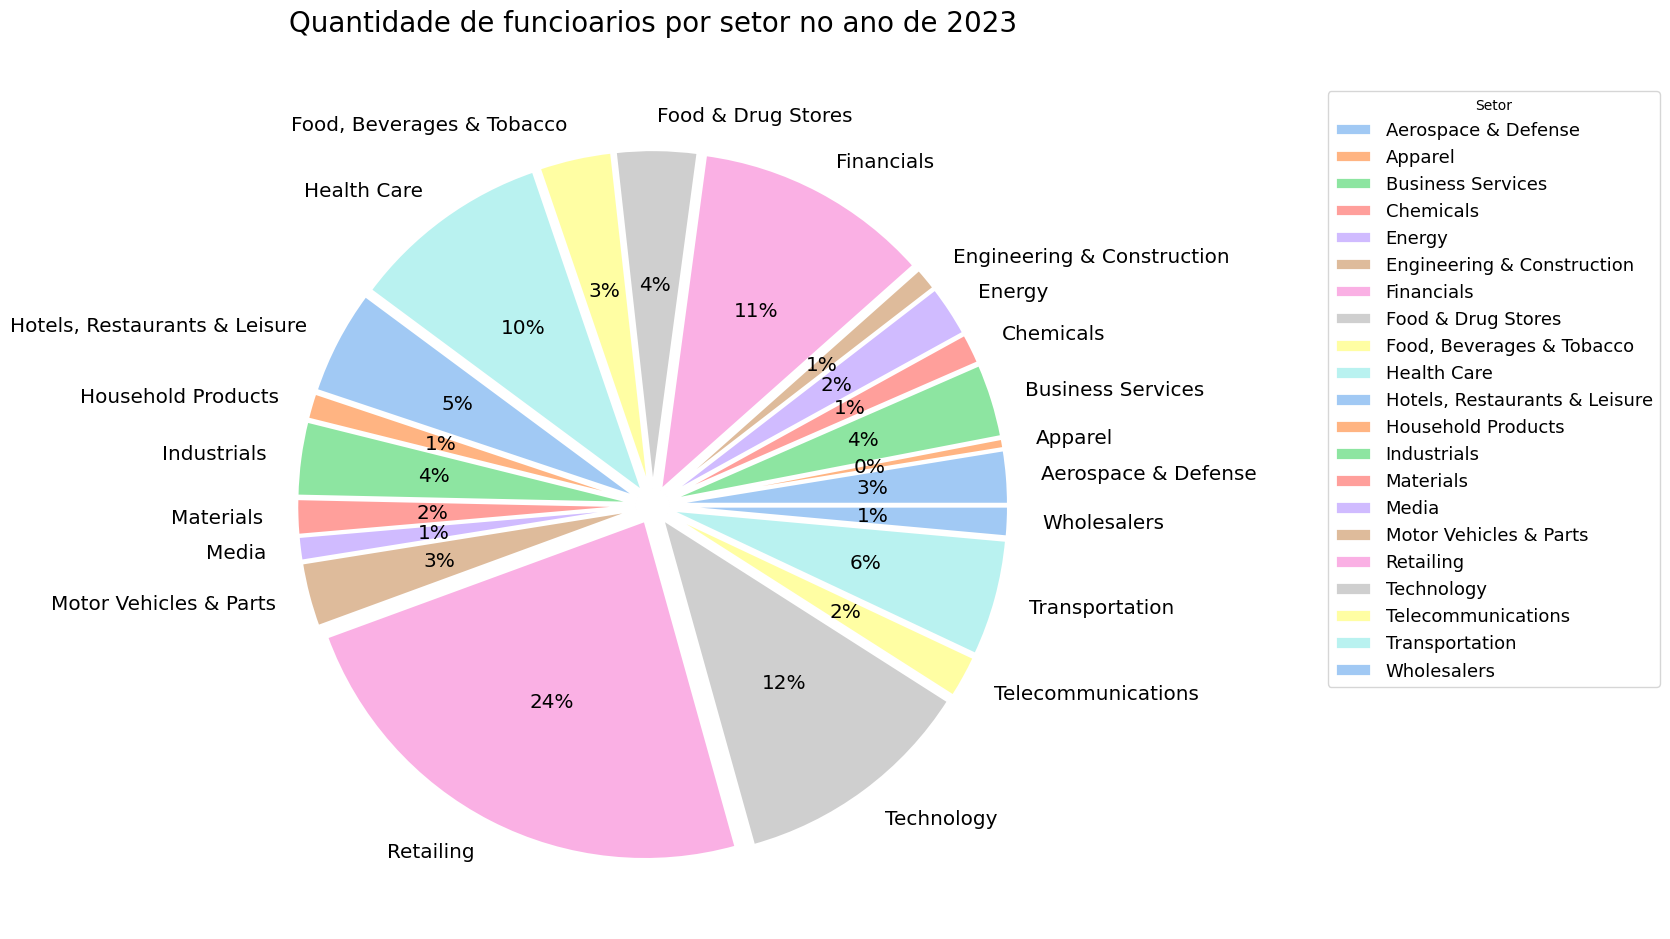

In [15]:
colors = sea.color_palette('pastel')[0:len(dados)]

plt.figure(figsize=(15,11))
plt.title('Quantidade de funcioarios por setor no ano de 2023',fontsize=20,y=1.05)
plt.pie(
    x      = dados.values,
    labels = dados.index.values,
    autopct='%.0f%%',
    wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'},
    textprops ={'size': 'x-large'},
    colors    =colors,
    explode   =tuple([0.05 for i in range(len(dados))])
)
plt.legend(dados.index.values,title="Setor",bbox_to_anchor=(1, 0, 0.7, 1),fontsize=13)
plt.show()

In [75]:
dataSetor1 = dataSetor.groupby(by=['setor','ano'])['funcionários'].sum()

In [79]:
dataSetor1 = dataSetor1.reset_index()

In [100]:
dataSetor1

,setor,ano,funcionários
0,Aerospace & Defense,2015,875576.0
1,Aerospace & Defense,2016,884301.0
2,Aerospace & Defense,2017,863840.0
3,Aerospace & Defense,2018,894100.0
4,Aerospace & Defense,2019,970500.0
...,...,...,...
184,Wholesalers,2019,608993.0
185,Wholesalers,2020,647312.0
186,Wholesalers,2021,660786.0
187,Wholesalers,2022,392308.0


## Seleção de dados

In [16]:
dataSetor2 = dataSetor.drop(
    dataSetor.loc[dataSetor['valor_de_mercado_mi']=='Nulo'].index
)

In [17]:
dados = dataSetor2.groupby('setor')['valor_de_mercado_mi'].sum()

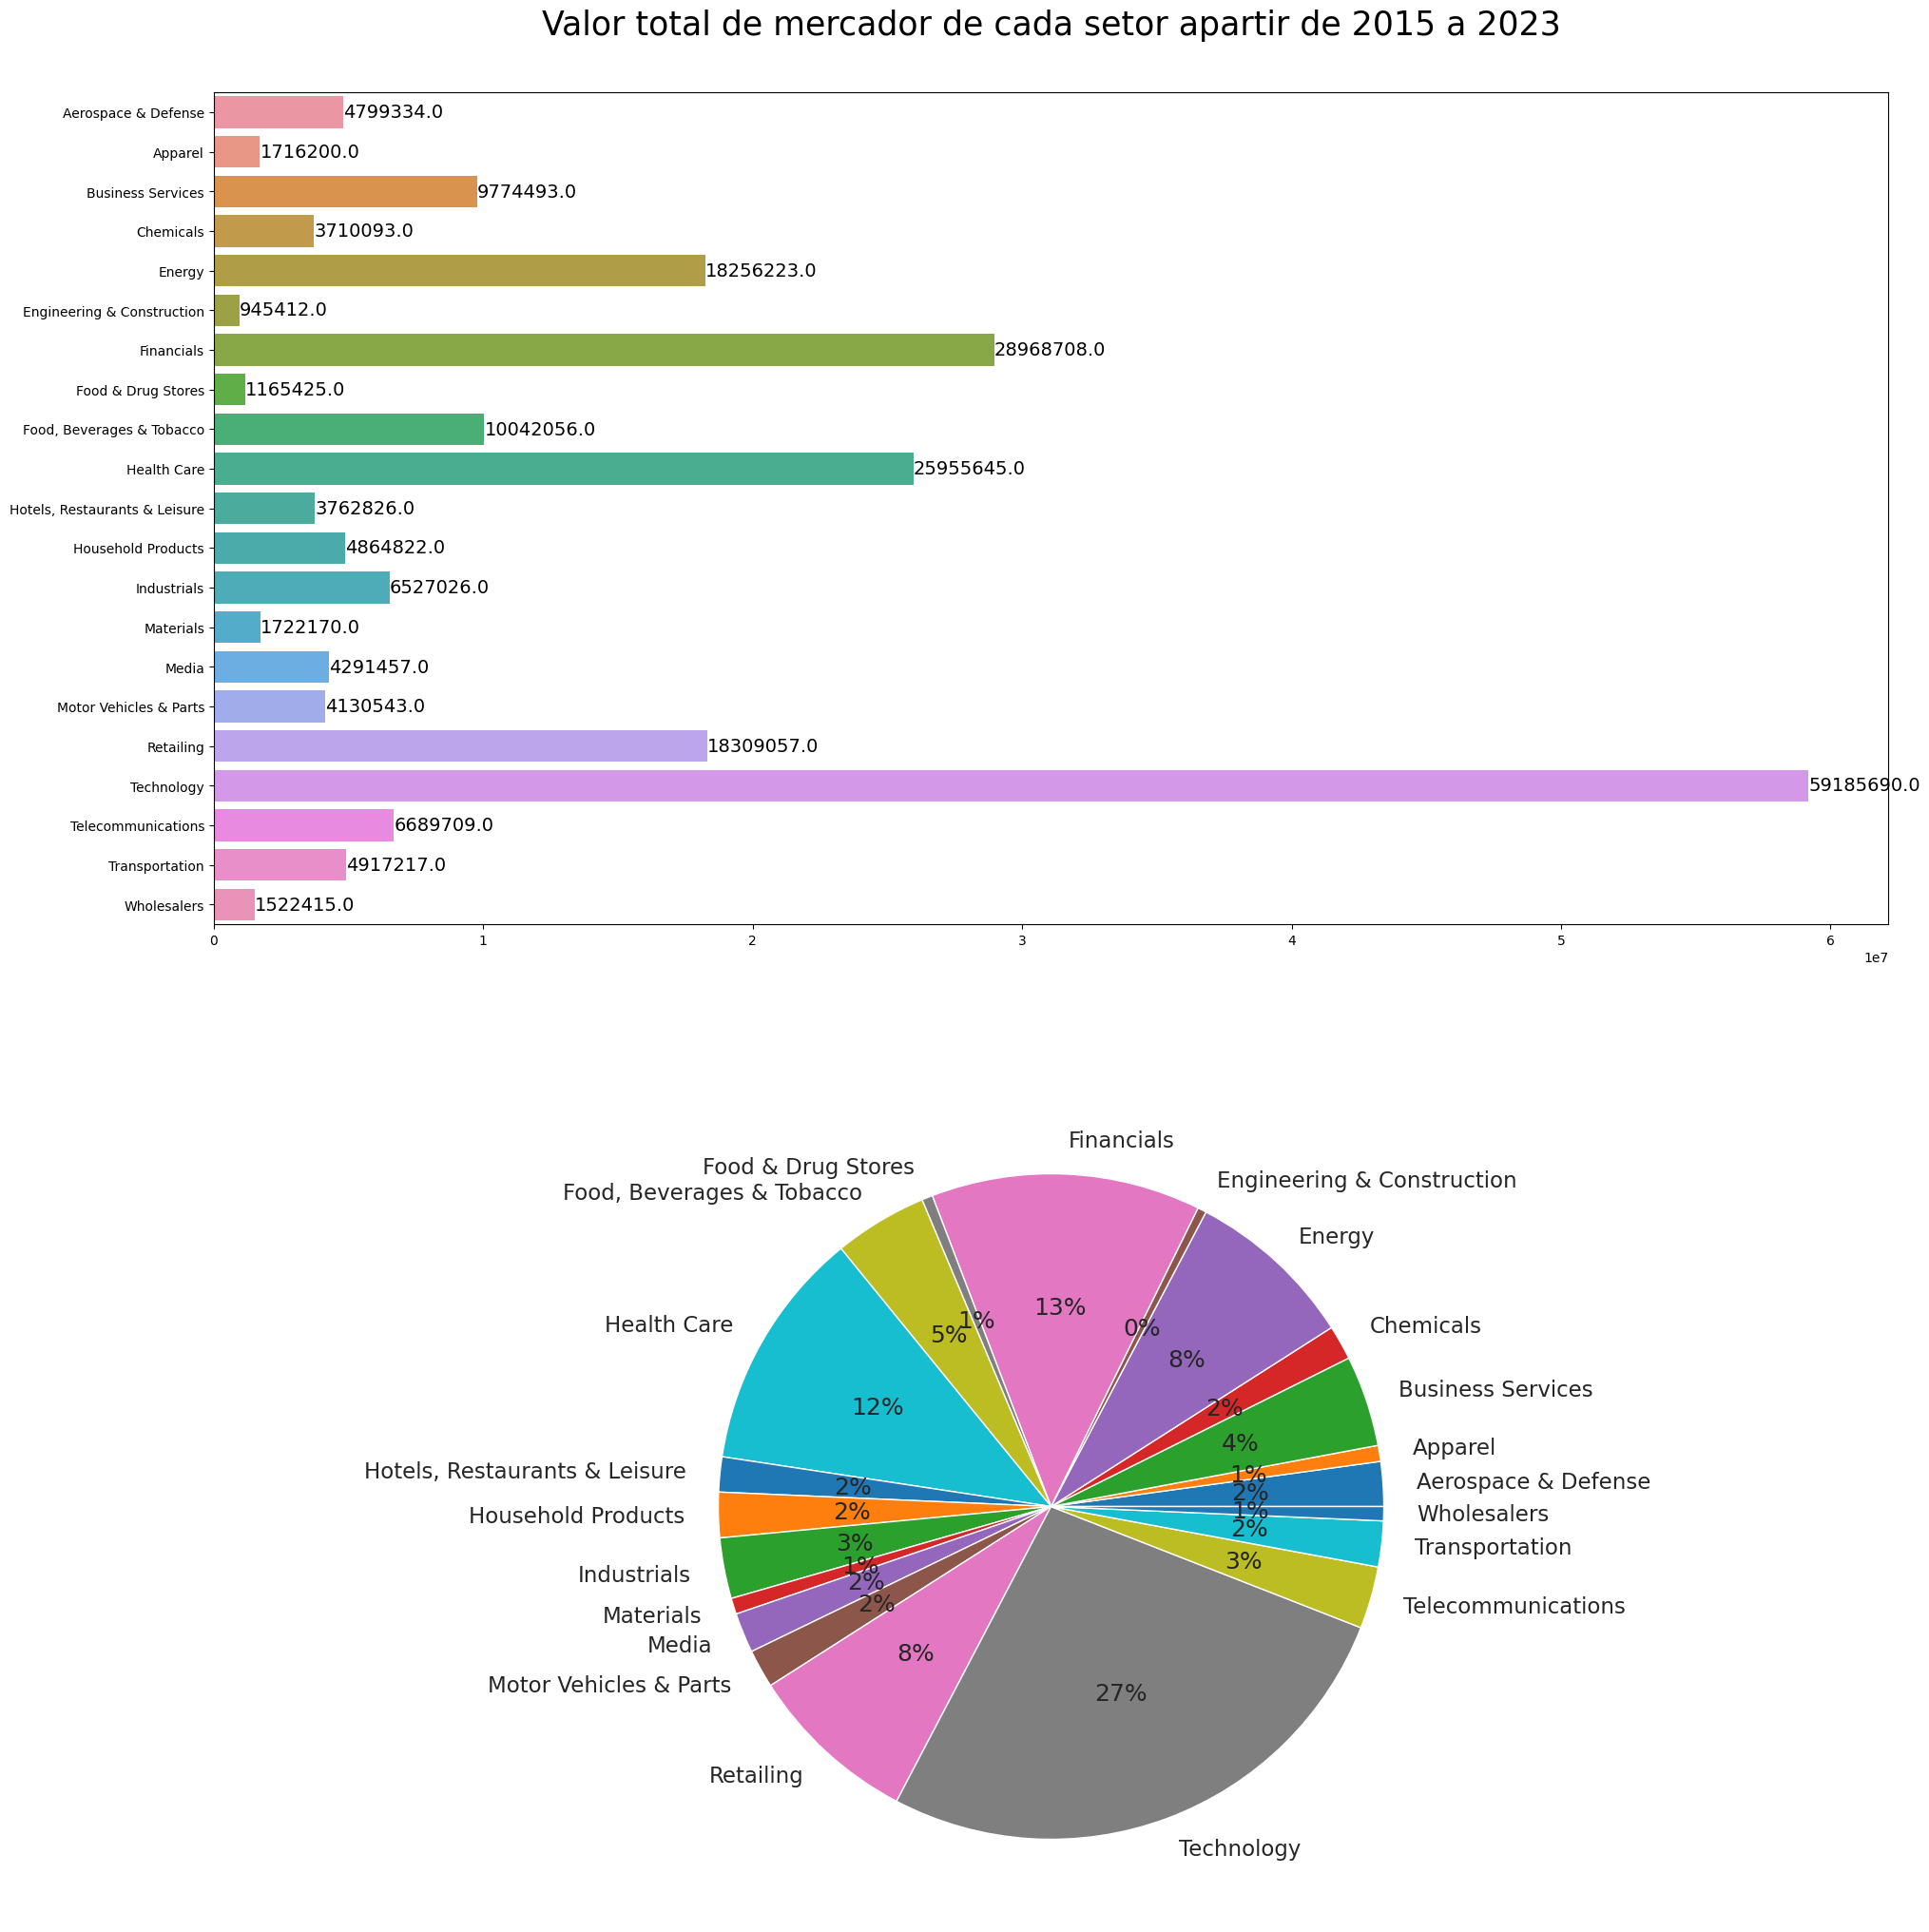

In [18]:
plt.figure(figsize=(50,25))
# lembrar aumenta a escalar l
plt.subplot(221)

sea.barplot(y=dados.index.values,x=dados.values)
sea.set_context("paper", font_scale=4.29)  

plt.title('Valor total de mercador de cada setor apartir de 2015 a 2023',fontsize=25,y=1.06)

# Colocar anotacao no barplot
ax = plt.gca() 
for p in ax.patches:
    ax.annotate("%.1f" % p.get_width(), (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='left', va='center', xytext=(0, 0), textcoords='offset points',fontsize=14)

plt.subplot(223)
sea.set(font_scale=1.5)
plt.pie( x = dados.values, labels = dados.index.values , autopct = '%.0f%%')
plt.show()

## Seleção de dados

In [19]:
dataSetor3 = dataSetor2.groupby(by=['setor','ano'])['valor_de_mercado_mi'].sum()

In [20]:
dataSetor3 = dataSetor3.reset_index()

In [21]:
dataSetor3.head(3)

,setor,ano,valor_de_mercado_mi
0,Aerospace & Defense,2015,452583.0
1,Aerospace & Defense,2016,390225.0
2,Aerospace & Defense,2017,484282.0


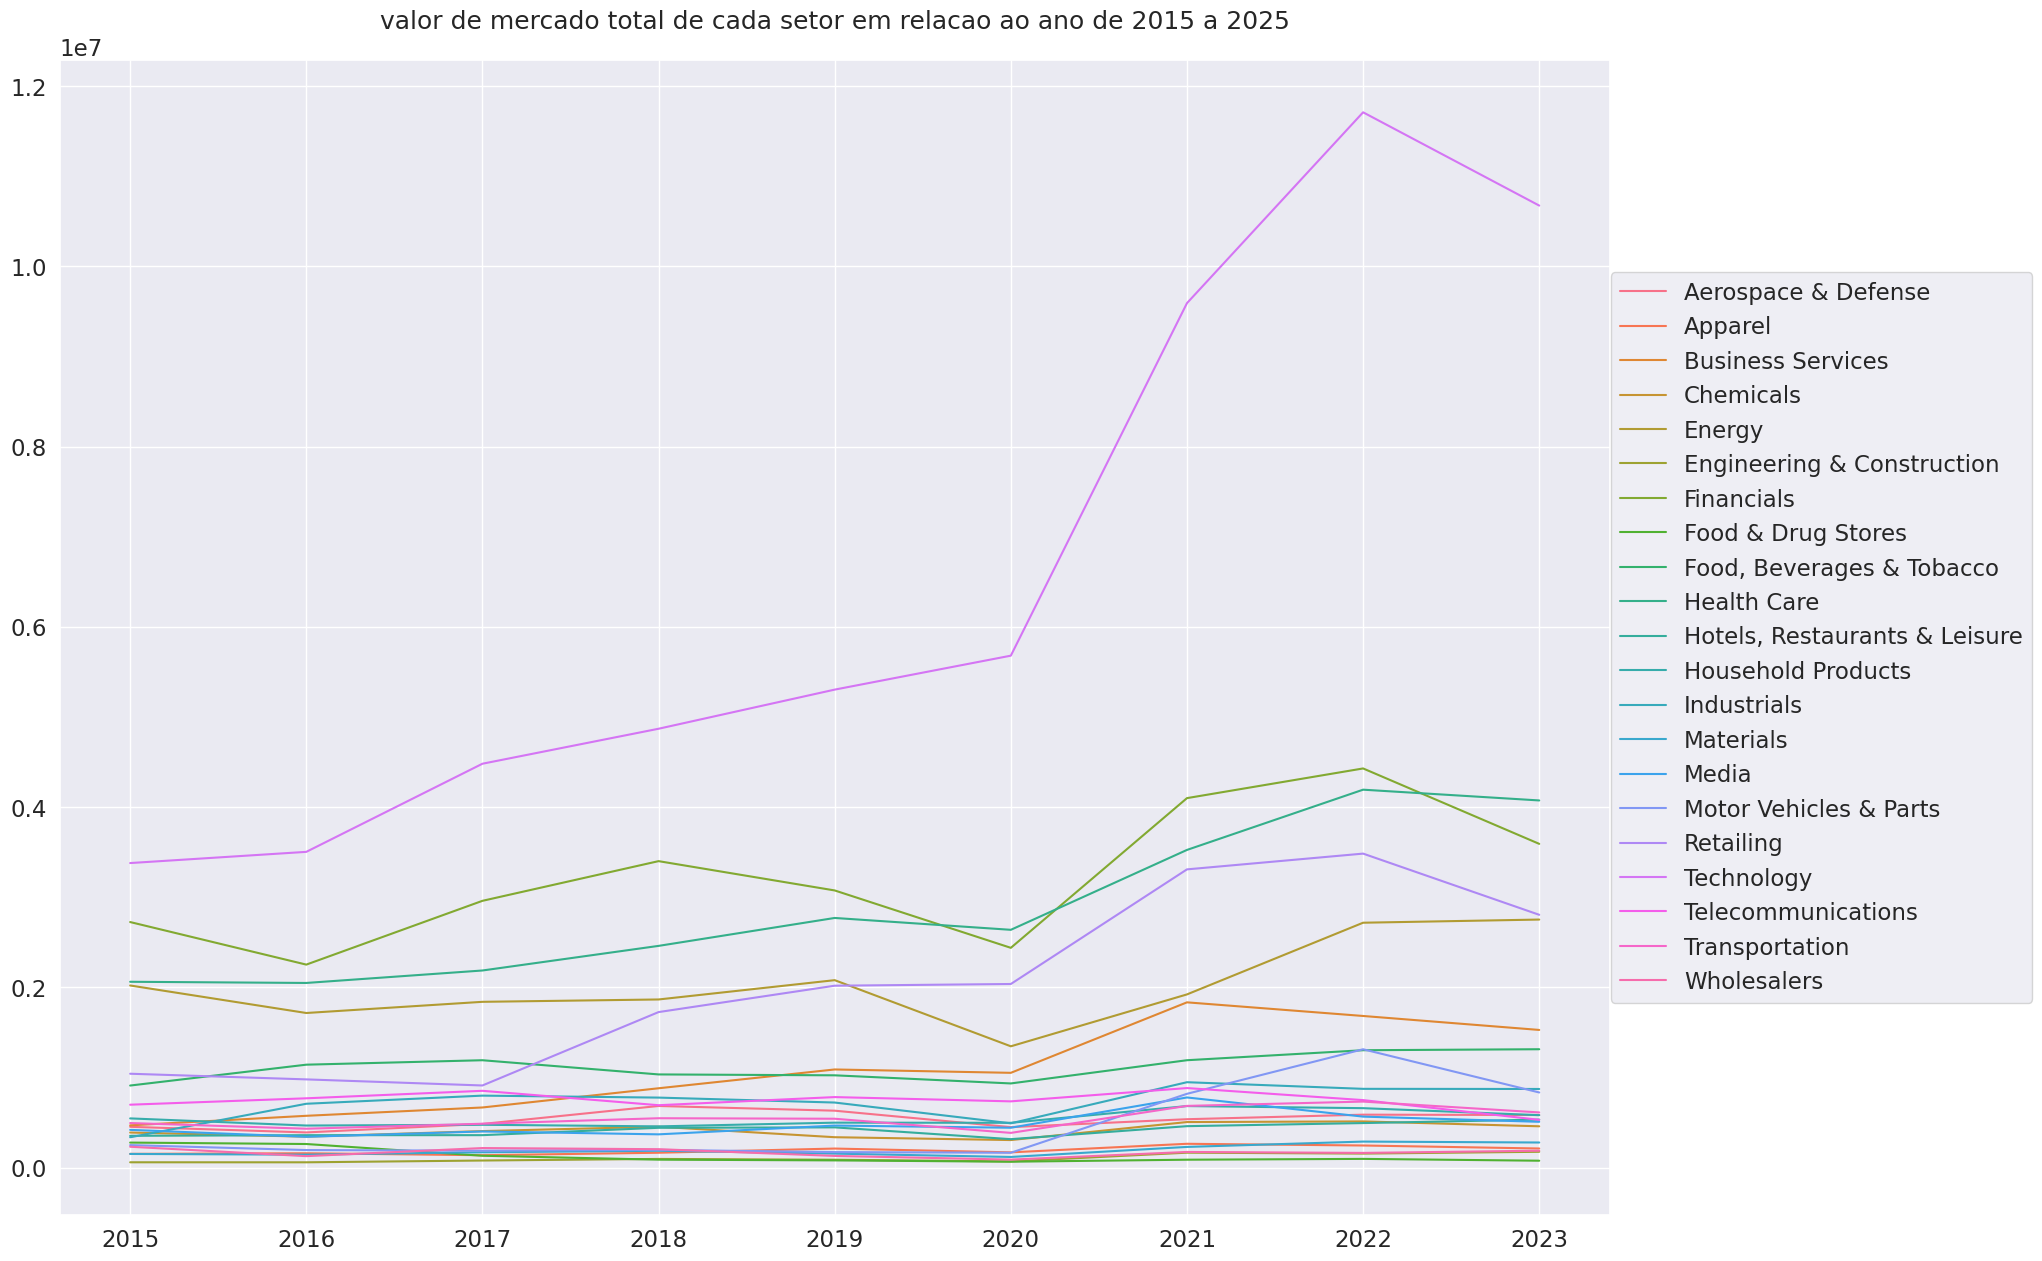

In [22]:
plt.figure(figsize=(20,15))

fig = sea.lineplot(
    x = dataSetor3['ano'].values ,
    y = dataSetor3['valor_de_mercado_mi'].values,
    hue = dataSetor3['setor'].values
)
plt.title('valor de mercado total de cada setor em relacao ao ano de 2015 a 2025',y=1.02)
sea.move_legend(fig, "right",bbox_to_anchor=(1, 0, 0.28, 1))
plt.show()

### Usando Plotly

In [23]:
fig = px.line(
        data_frame= dataSetor3,
        x = 'ano',
        y = 'valor_de_mercado_mi',   
        color ='setor',
        width =1000,
        height=550 ,
        title ='valor de mercado total de cada setor em relacao ao ano de 2015 a 2025'
    )
fig.update_layout(hovermode='closest')
fig.show()

## Seleçao de dados

In [24]:
dataFeminina = dataSetor.loc[dataSetor['ceo_feminino']=='yes'].groupby(by=['ano'])['ceo_feminino'].count()

dataFeminina = dataFeminina.reset_index()

In [25]:
dataFeminina

,ano,ceo_feminino
0,2015,23
1,2016,23
2,2017,32
3,2018,25
4,2019,36
5,2020,41
6,2021,42
7,2022,52
8,2023,52


In [26]:
dataMasculino = dataSetor.loc[dataSetor['ceo_feminino']=='no'].groupby(by=['ano'])['ceo_feminino'].count() 
dataMasculino = dataMasculino.reset_index()
dataMasculino.columns = ['ano','ceo_masculino']

In [27]:
dataMasculino

,ano,ceo_masculino
0,2015,477
1,2016,477
2,2017,468
3,2018,475
4,2019,464
5,2020,459
6,2021,458
7,2022,448
8,2023,448


In [28]:
dataGenero = dataFeminina.merge(dataMasculino,how='inner',on='ano')
dataGenero

,ano,ceo_feminino,ceo_masculino
0,2015,23,477
1,2016,23,477
2,2017,32,468
3,2018,25,475
4,2019,36,464
5,2020,41,459
6,2021,42,458
7,2022,52,448
8,2023,52,448


In [29]:
dataGenero = dataGenero.set_index('ano')

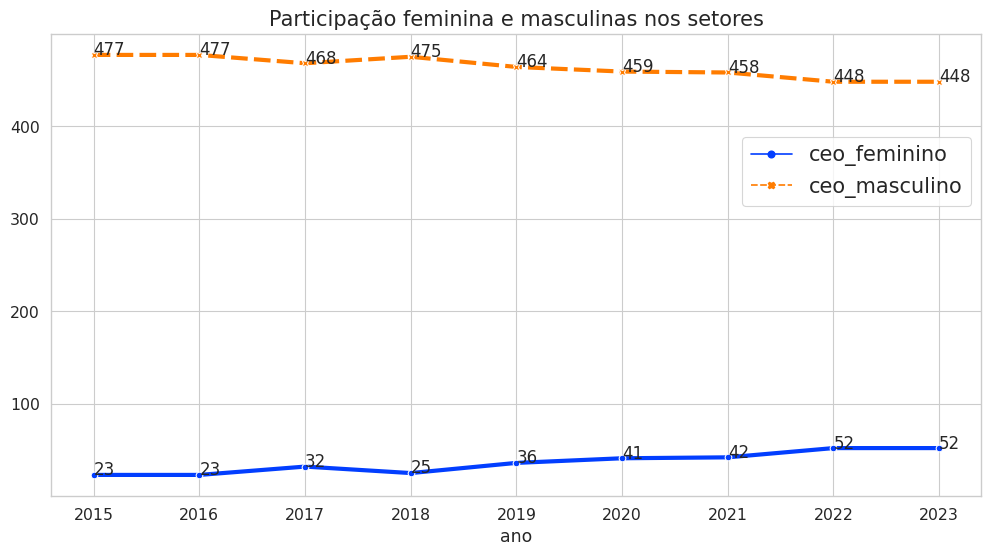

In [30]:
plt.figure(figsize=(12,6))
sea.set_theme(context='paper',style='whitegrid',palette='bright')
sea.set_context("paper", font_scale=1.29)  

sea.lineplot(dataGenero,dashes=True,markers=True,linewidth=3)

plt.title('Participação feminina e masculinas nos setores',fontsize=15)
plt.legend( bbox_to_anchor=(1, -0.2, 0, 1),fontsize=15 )
for i in dataGenero.reset_index().iterrows():
    plt.text(i[1][0],i[1][2],f'{i[1][2]}',fontsize=12)
    plt.text(i[1][0],i[1][1],f'{i[1][1]}',fontsize=12)

plt.show()

## Seleção de dados
* Analise do setores que estao melhor posicionado no ranking

In [52]:
ranking = dataSetor[['ano','setor','rank']].loc[(dataSetor['rank']>=1) & (dataSetor['rank']<=3)]

In [67]:
for posicao in range(1,4):
    print(f'Na posicao {posicao}')
    print(ranking['setor'].loc[ranking['rank']==posicao].value_counts().to_string())
    print('\n')

Na posicao 1
setor
Retailing    9


Na posicao 2
setor
Energy        4
Retailing     4
Financials    1


Na posicao 3
setor
Technology    5
Energy        3
Financials    1




O setor de retailing eo mais rentavel 

# Industria

In [31]:
data.head(3)

,nome,rank,ano,industria,setor,sede_estado,sede_cidade,valor_de_mercado_mi,receite_mil,lucro_mil,ativos_mil,funcionários,fundador_is_ceo,ceo_feminino,recém-chegado à Fortune 500,global_500
0,General Motors Corporation,1,1996,Motor Vehicles & Parts,Nulo,MI,Nulo,Nulo,168828.6,Nulo,Nulo,Nulo,Nulo,Nulo,Nulo,Nulo
1,Ford Motor Company,2,1996,Motor Vehicles & Parts,Nulo,MI,Nulo,Nulo,137137.0,Nulo,Nulo,Nulo,Nulo,Nulo,Nulo,Nulo
2,Exxon Corporation,3,1996,Petroleum Refining,Nulo,TX,Nulo,Nulo,110009.0,Nulo,Nulo,Nulo,Nulo,Nulo,Nulo,Nulo


In [33]:
data['industria'].value_counts()

industria
Utilities: Gas and Electric                 753
Commercial Banks                            590
Insurance: Property and Casualty (Stock)    497
Chemicals                                   420
Motor Vehicles & Parts                      385
                                           ... 
Payroll Services                              5
X Brokerage                                   5
Equipment Leasing                             4
Education                                     3
Marine services                               2
Name: count, Length: 94, dtype: int64